In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(1152, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1152)              1

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    verbose="auto",
    validation_split=0.2,
    use_multiprocessing=True
)


Epoch 1/10
1500/1500 [==============================] - 36s 23ms/step - loss: 0.1629 - accuracy: 0.9499 - val_loss: 0.0629 - val_accuracy: 0.9814
Epoch 2/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 0.0486 - val_accuracy: 0.9862
Epoch 3/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0449 - val_accuracy: 0.9862
Epoch 4/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0457 - val_accuracy: 0.9886
Epoch 5/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0455 - val_accuracy: 0.9874
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0466 - val_accuracy: 0.9887
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0543 -

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


313/313 [==============================] - 2s 6ms/step - loss: 0.0490 - accuracy: 0.9874
Test Loss: 0.049004554748535156
Test Accuracy: 0.9873999953269958


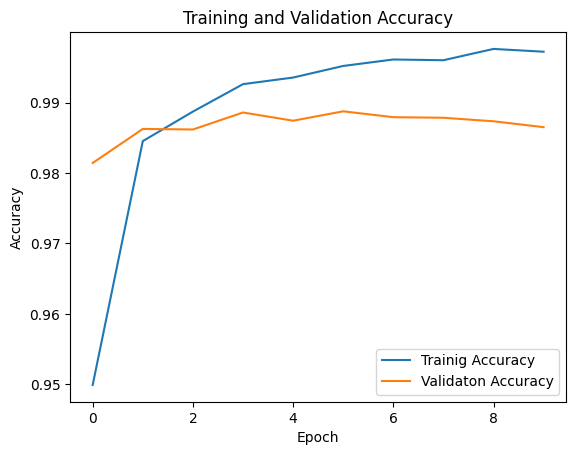

In [13]:
plt.plot(history.history['accuracy'], label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'], label='Validaton Accuracy')

# Adding Labels and title
plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Adding a Legend to the plot
plt.legend()

# Display the plot
plt.show()


313/313 [==============================] - 2s 5ms/step


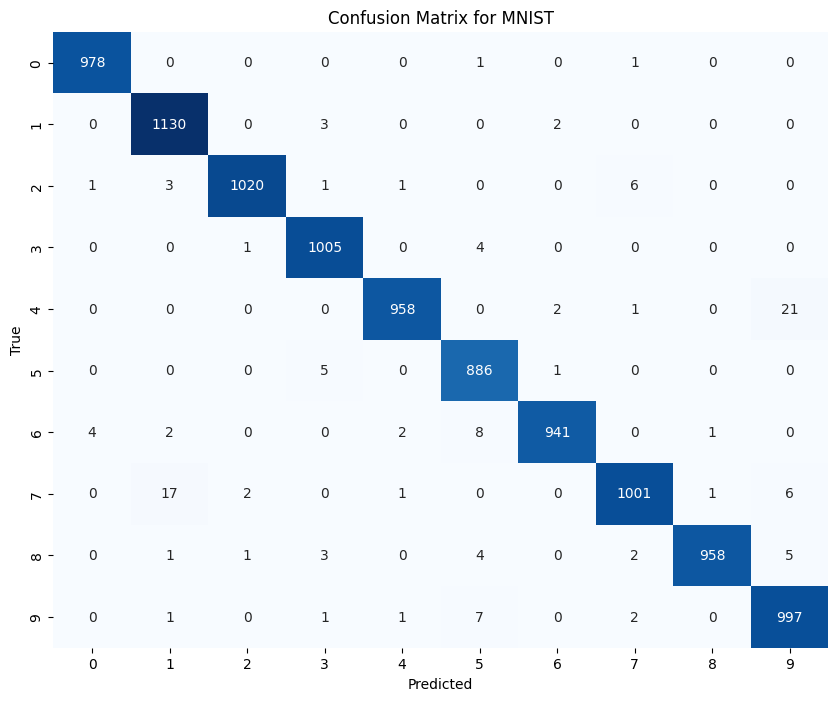

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred= model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(10), yticklabels=range(10))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for MNIST")

plt.show()


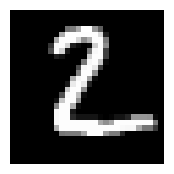

In [17]:
plt.figure(figsize=(2, 2))
plt.imshow(X_test[1], cmap='gray')
plt.axis('off')
plt.show()



Predicted Label: 2
313/313 [==============================] - 3s 9ms/step


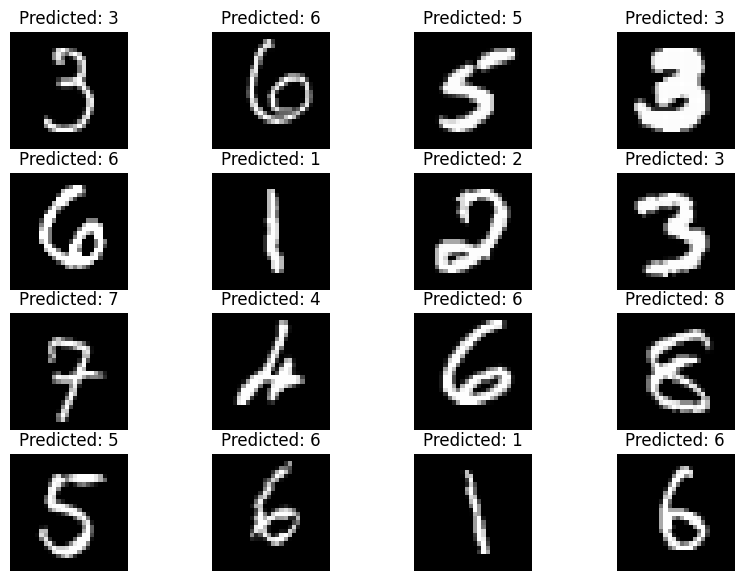

In [18]:
predicted_label = y_pred[1].argmax()
print('Predicted Label:', predicted_label)

# predictions variable is not defined, assuming it's y_pred
predictions = model.predict(X_test)

image_indices = [1503, 100, 155, 200, 886, 302, 400, 500, 550, 247, 384, 1202, 1521, 2000, 2504, 3000]

plt.figure(figsize=(10, 7))

for i, index in enumerate(image_indices, 1):
    plt.subplot(4, 4, i)
    plt.imshow(X_test[index], cmap="gray")
    plt.axis("off")

    predicted_label = predictions[index].argmax()
    plt.title(f"Predicted: {predicted_label}")

plt.show()